In [18]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import re

plt.rcParams.update({
    "text.usetex": True,
})
id=0


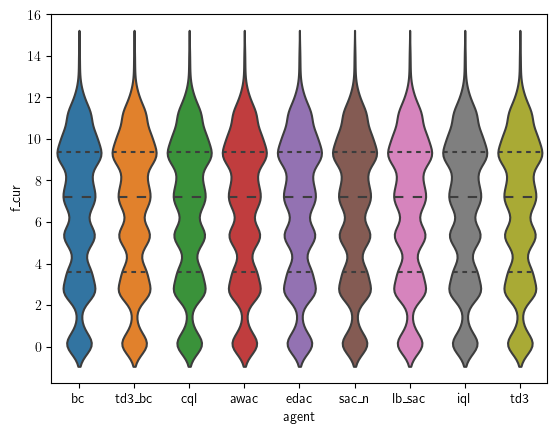

In [21]:
base_path = "../dataiter_ffix_hpo-10-64-red_no_arch_red_drop/ToySGD"
for function in ["Sphere"]:#, "Rastrigin", "Rosenbrock", "Sphere"]:
    for teacher in ["step_decay"]:#, "exponential_decay", "sgdr", "constant"]:
        data = []
        for agent in ["bc", "td3_bc", "cql", "awac", "edac", "sac_n", "lb_sac", "iql", "td3"]:
            # agent_path = Path(base_path, teacher, str(id), function, "results", agent)
            agent_path = Path(base_path, "step_decay", "0", "Ackley", "results", "bc")
            agent_data = []
            for path in agent_path.rglob("*/eval_data.csv"):
                try:
                    seed_data = pd.read_csv(path)
                except:
                    continue
                agent_data.append(seed_data)
            
            agent_data = pd.concat(agent_data)
            agent_data["agent"] = agent
            data.append(agent_data)

        data = pd.concat(data)
        sns.violinplot(data, x="agent", y="f_cur", inner="quart", )
